# THE SPARKS FOUNDATION

## GRIP MARCH 22(Data science and Business analytics)
## Task 1 - Prediction using Supervised Machine Learning
### AUTHOR - SHAHUL HAMEED A M 

### OBJECTIVE:
* To predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

# ***SIMPLE LINEAR REGRESSION PROBLEM***

### Importing necessary Libraries

In [134]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats
# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot
from statsmodels.compat import lzip
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

### Reading dataset using thee URL LINK

In [135]:
df = pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30
5,1.500000,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


In [136]:
df.head(10)  # first ten records

,Hours,Scores
0,2.500000,21
1,5.100000,47
2,3.200000,27
3,8.500000,75
4,3.500000,30
5,1.500000,20
6,9.200000,88
7,5.500000,60
8,8.300000,81
9,2.700000,25


In [137]:
df.tail(10)  # last ten records

,Hours,Scores
15,8.900000,95
16,2.500000,30
17,1.900000,24
18,6.100000,67
19,7.400000,69
20,2.700000,30
21,4.800000,54
22,3.800000,35
23,6.900000,76
24,7.800000,86


### Understanding the Dataset

### Data Dimension

In [138]:
df.shape

(25, 2)

**Interpretation:** We can see the dataframe has 2 columns and 25 observations.

### Data Definition

In [139]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

**Interpretation:** 

* Hours: Number of hours students studied (Numeric feature)
* Scores: Scores obtained by students (Numeric feature)

### Summary Statistics

In [140]:
# descriptive statistics
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Interpretation:**

* If a student **approximately studies 1 hour/day** he is able to score atleast  **17%**.
* If a student **approximately studies 5 hour/day** he is able to score avaeragly around **51%**.
* If a student **approximately studies 9 hour/day** he is able to score with a maximum score of **95%**.

### Missing Value Treatment

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [142]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Interpretation:**

* We can infer that there are no null column.
* There is no missing values in our dataset.

## Checking for Outliers

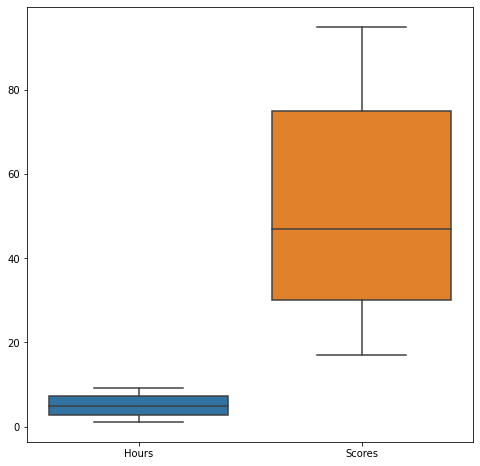

In [143]:
plt.rcParams['figure.figsize']=(8,8)

sns.boxplot(data=df)

plt.show()

**There is no outliers or extreme observations present in the dataset**

## Checking for Correlation

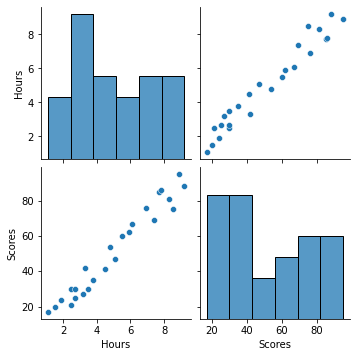

In [144]:
sns.pairplot(df);

In [145]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


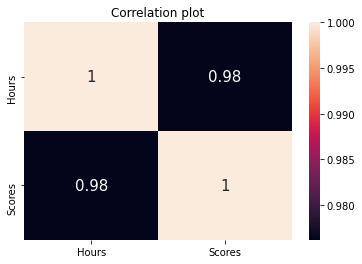

In [146]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot = True,annot_kws={"size": 15})
plt.title('Correlation plot')
plt.show()

**We can infer that there is high positive correlation between these two variables**


### Distribution Plots

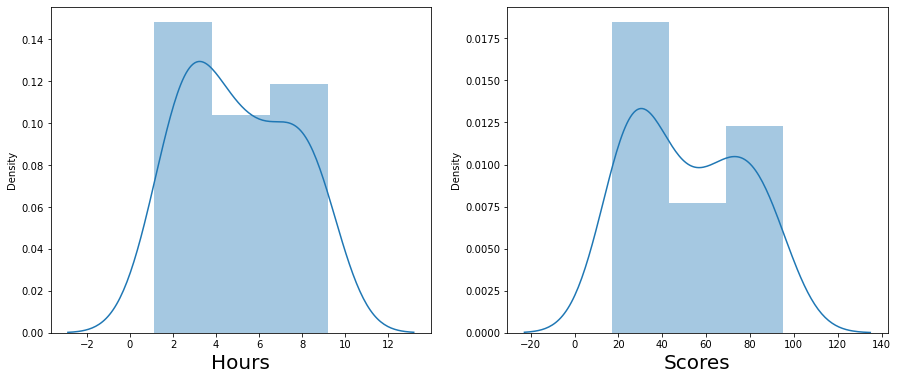

In [147]:
fig,ax = plt.subplots(1,2,figsize=(15,6))

for var,ax in zip(df.columns,ax.flatten()):
    z = sns.distplot(df[var],ax=ax)
    z.set_xlabel(var,fontsize=20)
        

**We can infer that those variables follows near normal distribution**

### Train Test Split

In [159]:
X = df.iloc[:,:1]
y = df['Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

X_train shape: (17, 1)
X_test shape: (8, 1)
y_train shape: (17,)
y_test shape: (8,)


In [161]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

## Model Parameters

In [162]:
print('Intercept:',model.intercept_)
print('Beta coefficient:', model.coef_)

Intercept: 2.794196676599803
Beta coefficient: [9.71054094]


## Plotting Regression Line

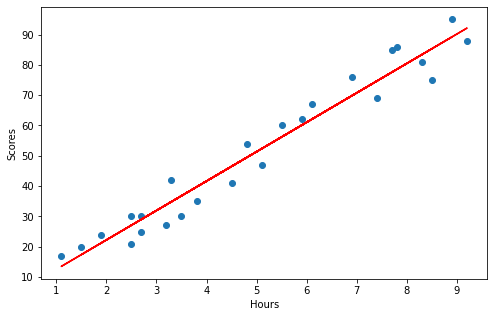

In [163]:
plt.figure(figsize=(8,5))
plt.scatter(X,y)
plt.xlabel("Hours")
plt.ylabel("Scores")
reg_line = model.coef_*X+model.intercept_
plt.plot(X.Hours,reg_line.Hours,'r');

### Train Prediction

In [164]:
y_train_pred = model.predict(X_train)
y_train_pred

array([39.69425223, 17.36000808, 33.86792767, 46.49163089, 89.21801101,
       85.33379464, 36.78108995, 29.0126572 , 21.24422446, 49.40479317,
       62.02849639, 78.53641598, 56.20217183, 77.56536189, 13.47579171,
       74.65219961, 92.13117329])

In [165]:
print("R-Square Value:" ,round(metrics.r2_score(y_train, y_train_pred),3))

R-Square Value: 0.954


**From the R-sqaure value we can infer that 95% variation of the model can be explained by Hours variable**

### Comparing predicted and actual values of Train data

In [166]:
pd.DataFrame({'Predicted' : y_train_pred,'Actual' : y_train,'Error': y_train_pred - y_train}).reset_index(drop = True)

,Predicted,Actual,Error
0,39.694252,35,4.694252
1,17.360008,20,-2.639992
2,33.867928,27,6.867928
3,46.491631,41,5.491631
4,89.218011,95,-5.781989
5,85.333795,75,10.333795
6,36.781090,30,6.781090
7,29.012657,30,-0.987343
8,21.244224,24,-2.755776
9,49.404793,54,-4.595207


### Test Prediction

In [167]:
y_test_pred = model.predict(X_test)
y_test_pred

array([83.39168645, 27.07054902, 27.07054902, 69.79692914, 60.0863882 ,
       29.0126572 , 34.83898177, 52.31795545])

In [168]:
print("R-Square Value:" ,round(metrics.r2_score(y_test, y_test_pred),3))

R-Square Value: 0.949


### Comparing predicted and actual values of Test data

In [169]:
pd.DataFrame({'Predicted' : y_test_pred,'Actual' : y_test,'Error': y_test_pred - y_test}).reset_index(drop = True)

,Predicted,Actual,Error
0,83.391686,81,2.391686
1,27.070549,30,-2.929451
2,27.070549,21,6.070549
3,69.796929,76,-6.203071
4,60.086388,62,-1.913612
5,29.012657,25,4.012657
6,34.838982,42,-7.161018
7,52.317955,47,5.317955


## Model Evaluation

In [170]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [171]:
# Creating Result table to compare train-test predictions

cols = ['Name', 'R-squared','MSE', 'RMSE', 'MAE', 'MAPE']
score_card = pd.DataFrame(columns = cols)

# finding performance metrics for train data
train_metrics = pd.Series({'Name': "Train Predictions",
                     'R-squared': round(metrics.r2_score(y_train, y_train_pred),3) ,
                     'MSE': round(metrics.mean_squared_error(y_train, y_train_pred),3),
                     'RMSE':round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)),3),
                     'MAE': round(metrics.mean_absolute_error(y_train, y_train_pred),3),
                     'MAPE':round(mape(y_train, y_train_pred),3)})

# finding performance metrics for test data
test_metrics = pd.Series({'Name': "Test Predictions",
                     'R-squared': round(metrics.r2_score(y_test, y_test_pred),3) ,
                     'MSE': round(metrics.mean_squared_error(y_test, y_test_pred),3),
                     'RMSE':round(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)),3),
                     'MAE': round(metrics.mean_absolute_error(y_test, y_test_pred),3),
                     'MAPE':round(mape(y_test, y_test_pred),3)})

score_card = score_card.append([train_metrics,test_metrics], ignore_index = True)

score_card

,Name,R-squared,MSE,RMSE,MAE,MAPE
0,Train Predictions,0.954000,31.398000,5.603000,5.171000,11.529000
1,Test Predictions,0.949000,23.619000,4.860000,4.500000,12.161000


### Final Interpretation:

* The R-Squared value for the  model is 95% on both train and test indicates that 95% of the variation in target variable can be explained by this model.
* Model Accuracy is 95%
* There is a strong positive correlation between Hours and Scores.
* RMSE of both train & test is less indicates model performance is good.